# FALL 2022 AS Advocacy Agenda Survey Result Analysis

### Office of Communications, UCSD Associated Students


- Survey goal/ purpose: Collecting inputs from students what students are looking for Associated Students in UCSD/ help determine AS priorities for the upcoming school year
- Survey period: Week 6 ~ Final Week of Fall 2022
- Survey conductor(s): Data Officer (Jiyeon Song, jis036@ucsd.edu), Office of Communications, UCSD Associated Students
- Survey participants: UCSD undergraduate students
- Total participants: 182
- Survey result link: https://docs.google.com/spreadsheets/d/1wS7-18ffVE9XoubB6v3hbioHSAJGgROoZFsnvsRfO98/edit?usp=sharing

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeRegressor


%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

In [18]:
responses = pd.read_csv('survey_fa22.csv')
responses

,Timestamp,UCSD Email Address (for the giveaway!),What college are you from?,What year are you?,How would you describe yourself? (feel free to add other),What academic division(s) are you in?,Where do you get your AS information from? Please select all that apply.,What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year?,What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year?,Do you feel that the current campus resources are able to accommodate your needs and do you think those are accessible?,...,"To verify and increase reliability on collecting the data, please click the answer ""AS"".",What is/are the best way(s) for your student representatives and Associated Students to reach out to you or which way you prefer to contact them?,What type of events/activities would you like to see from AS or colleges' councils?,Would you be more interested in in-person or virtual events?,What is/are the area(s) of campus life that you liked and enjoyed the most in the current academic year?,What is/are the area(s) of campus life that you're excited and looking forward about in the upcoming year?,What is/are the area(s) of campus life that you worried and concerned the most in the current academic year?,What is/are the area(s) of campus life that you're worried and concerned about in the upcoming year?,What is/are the area(s) of campus life that you'd like to LEARN more about in the upcoming year?,Additional comments/opinions that you want to share with Associated Students?
0,11/2/2022 10:38:17,cydeng@ucsd.edu,Sixth,Third year/First year transfer Student,NaN,Data Science,"AS Newsletter (Email), Campus/College Newslett...","Spirit & Athletics (building school spirit), E...","Spirit & Athletics (building school spirit), E...",Yes,...,AS,"Email, Appointment meeting (zoom/in-person)",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
1,11/2/2022 12:03:25,veliu@ucsd.edu,Seventh,Second year Student,"In-state student, First Gen student",Social Sciences,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), Sp...",Environmental Justice Affairs (intersectional ...,Yes,...,AS,"Email, Virtual Office Hours, Social Networking...",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
2,11/2/2022 12:35:57,mcl005@ucsd.edu,John Muir,Third year/First year transfer Student,"Out-of-state student, International student",Social Sciences,"AS Newsletter (Email), Instagram Account (@ASU...","Academic Affairs (academic accommodations), He...","Academic Affairs (academic accommodations), He...",No,...,AS,"Email, Social Networkings (e.g. @asucsd Instag...",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
3,11/3/2022 0:20:57,hmyers@ucsd.edu,Thurgood Marshall,Fourth year/Second year transfer Student,"In-state student, First Gen student",Arts and Humanities,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), En...","Spirit & Athletics (building school spirit), C...","Yes my needs are accommodated, no I don't thin...",...,AS,"Email, Appointment meeting (zoom/in-person)",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
4,11/7/2022 19:11:16,Jjquiroz@ucsd.edu,Earl Warren,Fourth year/Second year transfer Student,"In-state student, First Gen student",Biological Sciences,AS Newsletter (Email),"Concerts & Events (Sun God Festival, special s...","Food & Housing Resources (basic needs, financi...",Yes,...,AS,Email,More concerts,Both (Either one),Events to meet people,Sungod,Transportation,Parking,Financial aid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,12/1/2022 7:29:54,khusarlazarova@ucsd.edu,Sixth,Fourth year/Second year transfer Student,"Transfer student, First Gen student",Arts and Humanities,AS Newsletter (Email),I would like to see the association take an in...,I would like to see the association take an in...,No,...,AS,Email,strike for more open classes,Both (Either one),NaN,NaN,The upper floor

In [21]:
filt_resp = responses.drop(columns = ['Timestamp', 'UCSD Email Address (for the giveaway!)'])
df = filt_resp[filt_resp['To verify and increase reliability on collecting the data, please click the answer "AS".'] == 'AS'].drop(columns = ['To verify and increase reliability on collecting the data, please click the answer "AS".']).rename(columns = {
    'What college are you from?': 'college', 
    'What year are you?': 'academic year', 
    'How would you describe yourself? (feel free to add other)': 'identity', 
    'What academic division(s) are you in?': 'academic division(s)', 
    'Where do you get your AS information from? Please select all that apply. ': 'getting AS information', 
    'What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year? ': 'funding', 
    'What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year? ': 'advocacy', 
    'Do you feel that the current campus resources are able to accommodate your needs and do you think those are accessible?': 'able to accommodate needs', 
    'If you answer "Yes" on the above question, which resource do you find most helpful and why?': 'yes-helpful', 
    'If you answer "No" on the above question, which resource do you feel needs more improvement to better accommodate students?': 'no-improvement', 
    'Are you interested in Student Lead Committee (check where AS Finance goes, give feedback how AS is doing, etc.)?': 'interested in student lead committee', 
    'Do you have any suggestion that AS can practice to improve their transparency?': 'improve transparency', 
    'I know what Associated Students is and am familiar with what they do.': 'know what AS is/does', 
    'If you answered the scale of 1-2 above, please describe in your own words what Associated Students is and what they do.': 'yes-know what AS is/does', 
    'There are student advocates at UC San Diego that understand my needs and concerns.': 'student advocates know what the needs and concerns', 
    'There are student advocates at UC San Diego that are actively working to address my needs and concerns.': 'student advocates work for the needs and concerns', 
    'Are you aware of which student representative advocates on YOUR needs and interests?': 'know who are student representative', 
    'Share your opinions and thoughts about Associated Students.': 'opinions/thoughts about AS', 
    'What is/are the best way(s) for your student representatives and Associated Students to reach out to you or which way you prefer to contact them?': 'best way to contact students', 
    "What type of events/activities would you like to see from AS or colleges' councils?": 'preferable events/activities', 
    'Would you be more interested in in-person or virtual events?': 'in-person or virtual', 
    'What is/are the area(s) of campus life that you liked and enjoyed the most in the current academic year?': 'past/present-liked/enjoyed',
    "What is/are the area(s) of campus life that you're excited and looking forward about in the upcoming year?": 'future-looking forward', 
    "What is/are the area(s) of campus life that you worried and concerned the most in the current academic year?": 'past/present-worried/concerned', 
    "What is/are the area(s) of campus life that you're worried and concerned about in the upcoming year?": 'future-worried/concerned', 
    "What is/are the area(s) of campus life that you'd like to LEARN more about in the upcoming year?": 'future-preferable resources', 
    'Additional comments/opinions that you want to share with Associated Students?': 'additional comments/opinions'})


In [23]:
df

,college,academic year,identity,academic division(s),getting AS information,funding,advocacy,able to accommodate needs,yes-helpful,no-improvement,...,opinions/thoughts about AS,best way to contact students,preferable events/activities,in-person or virtual,past/present-liked/enjoyed,future-looking forward,past/present-worried/concerned,future-worried/concerned,future-preferable resources,additional comments/opinions
0,Sixth,Third year/First year transfer Student,NaN,Data Science,"AS Newsletter (Email), Campus/College Newslett...","Spirit & Athletics (building school spirit), E...","Spirit & Athletics (building school spirit), E...",Yes,NaN,NaN,...,NaN,"Email, Appointment meeting (zoom/in-person)",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
1,Seventh,Second year Student,"In-state student, First Gen student",Social Sciences,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), Sp...",Environmental Justice Affairs (intersectional ...,Yes,The biggest resource has been the different ce...,NaN,...,I think it seems like theres a barrier between...,"Email, Virtual Office Hours, Social Networking...",NaN,In-person,NaN,NaN,NaN,NaN,NaN,NaN
2,John Muir,Third year/First year transfer Student,"Out-of-state student, International student",Social Sciences,"AS Newsletter (Email), Instagram Account (@ASU...","Academic Affairs (academic accommodations), He...","Academic Affairs (academic accommodations), He...",No,NaN,NaN,...,NaN,"Email, Social Networkings (e.g. @asucsd Instag...",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
3,Thurgood Marshall,Fourth year/Second year transfer Student,"In-state student, First Gen student",Arts and Humanities,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), En...","Spirit & Athletics (building school spirit), C...","Yes my needs are accommodated, no I don't thin...",NaN,NaN,...,NaN,"Email, Appointment meeting (zoom/in-person)",NaN,Both (Either one),NaN,NaN,NaN,NaN,NaN,NaN
4,Earl Warren,Fourth year/Second year transfer Student,"In-state student, First Gen student",Biological Sciences,AS Newsletter (Email),"Concerts & Events (Sun God Festival, special s...","Food & Housing Resources (basic needs, financi...",Yes,Basic needs hub,NaN,...,NaN,Email,More concerts,Both (Either one),Events to meet people,Sungod,Transportation,Parking,Financial aid,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,Sixth,Fourth year/Second year transfer Student,"Transfer student, First Gen student",Arts and Humanities,AS Newsletter (Email),I would like to see the association take an in...,I would like to see the association take an in...,No,NaN,"This school really need more classes, because ...",...,where are they?,Email,strike for more open classes,Both (Either one),NaN,NaN,The upper floor of the Mandeville building is ...,NaN,NaN,NaN
178,John Muir,Third year/First year transfer Student,"In-state student, Transfer student, First Gen ...","Biological Sciences, Health Sciences","AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), Sp...","Spirit & Athletics (building school spirit), E...",No,NaN,Parking,...,NaN,"Email, Virtual Office Hours, Social Networking...",NaN,Virtual,NaN,NaN,NaN,NaN,NaN,NaN
179,Revelle,Second year Student,In-state student,Biological Sciences,Instagram Account (@ASUCSD or other AS affilia...,"College Affairs (college community building, l...","College Affairs (college community building, l...",Yes,NaN,NaN,...,NaN,"Email, Social Networkings (e.g. @asucsd Instag...",events that encourage you to interact with oth...,In-person,Sun God festival and college concerts!,Spirit week!,TA strikes,Also TA strikes and my grades,NaN,NaN
180,Thurgood Marshall,Third year/First year transfer Student,"In-state student, Transfer student, Homeless",Social Sciences,"AS Newsletter (Email), Campus/College Newslett...","Academic Affairs (academic accommodations), Co...","

## Students' Demographics:

<AxesSubplot:xlabel='college', ylabel='count'>

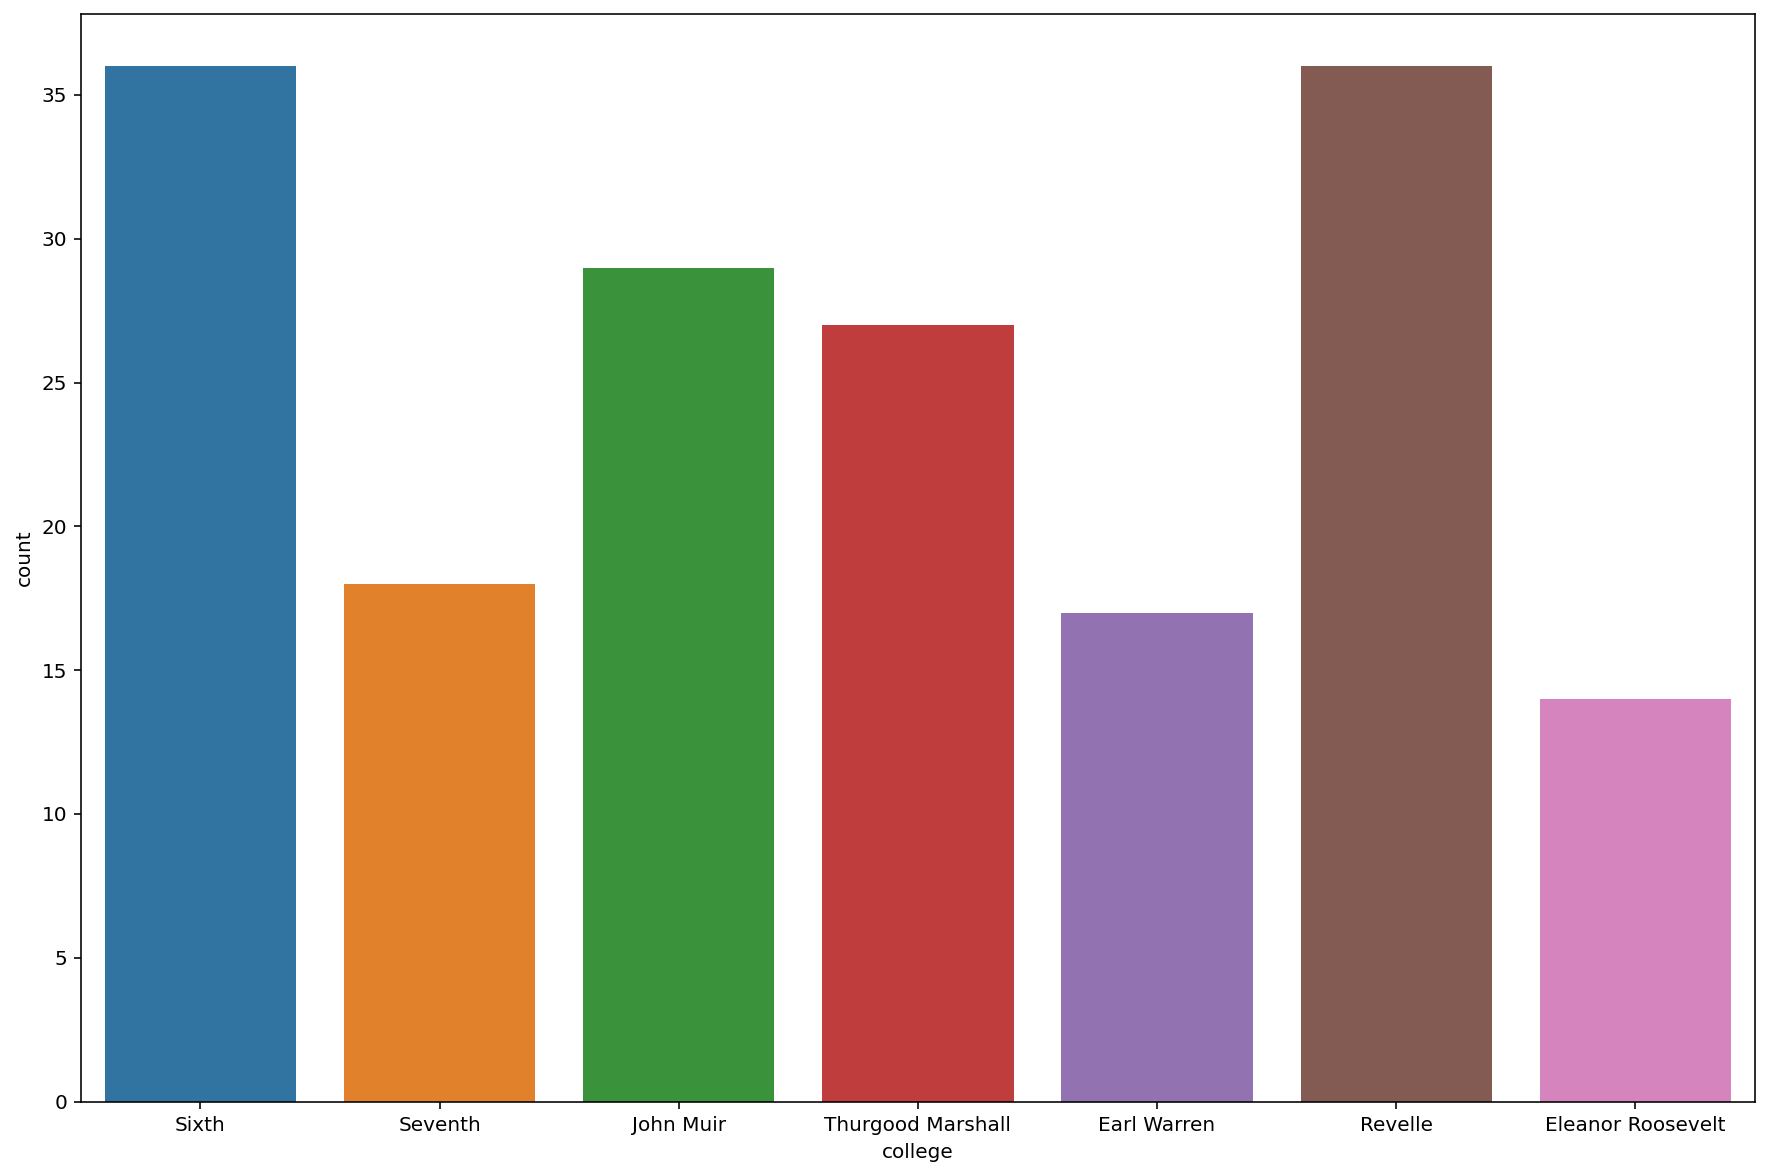

In [37]:
# college
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = df["college"])

<AxesSubplot:xlabel='academic year', ylabel='count'>

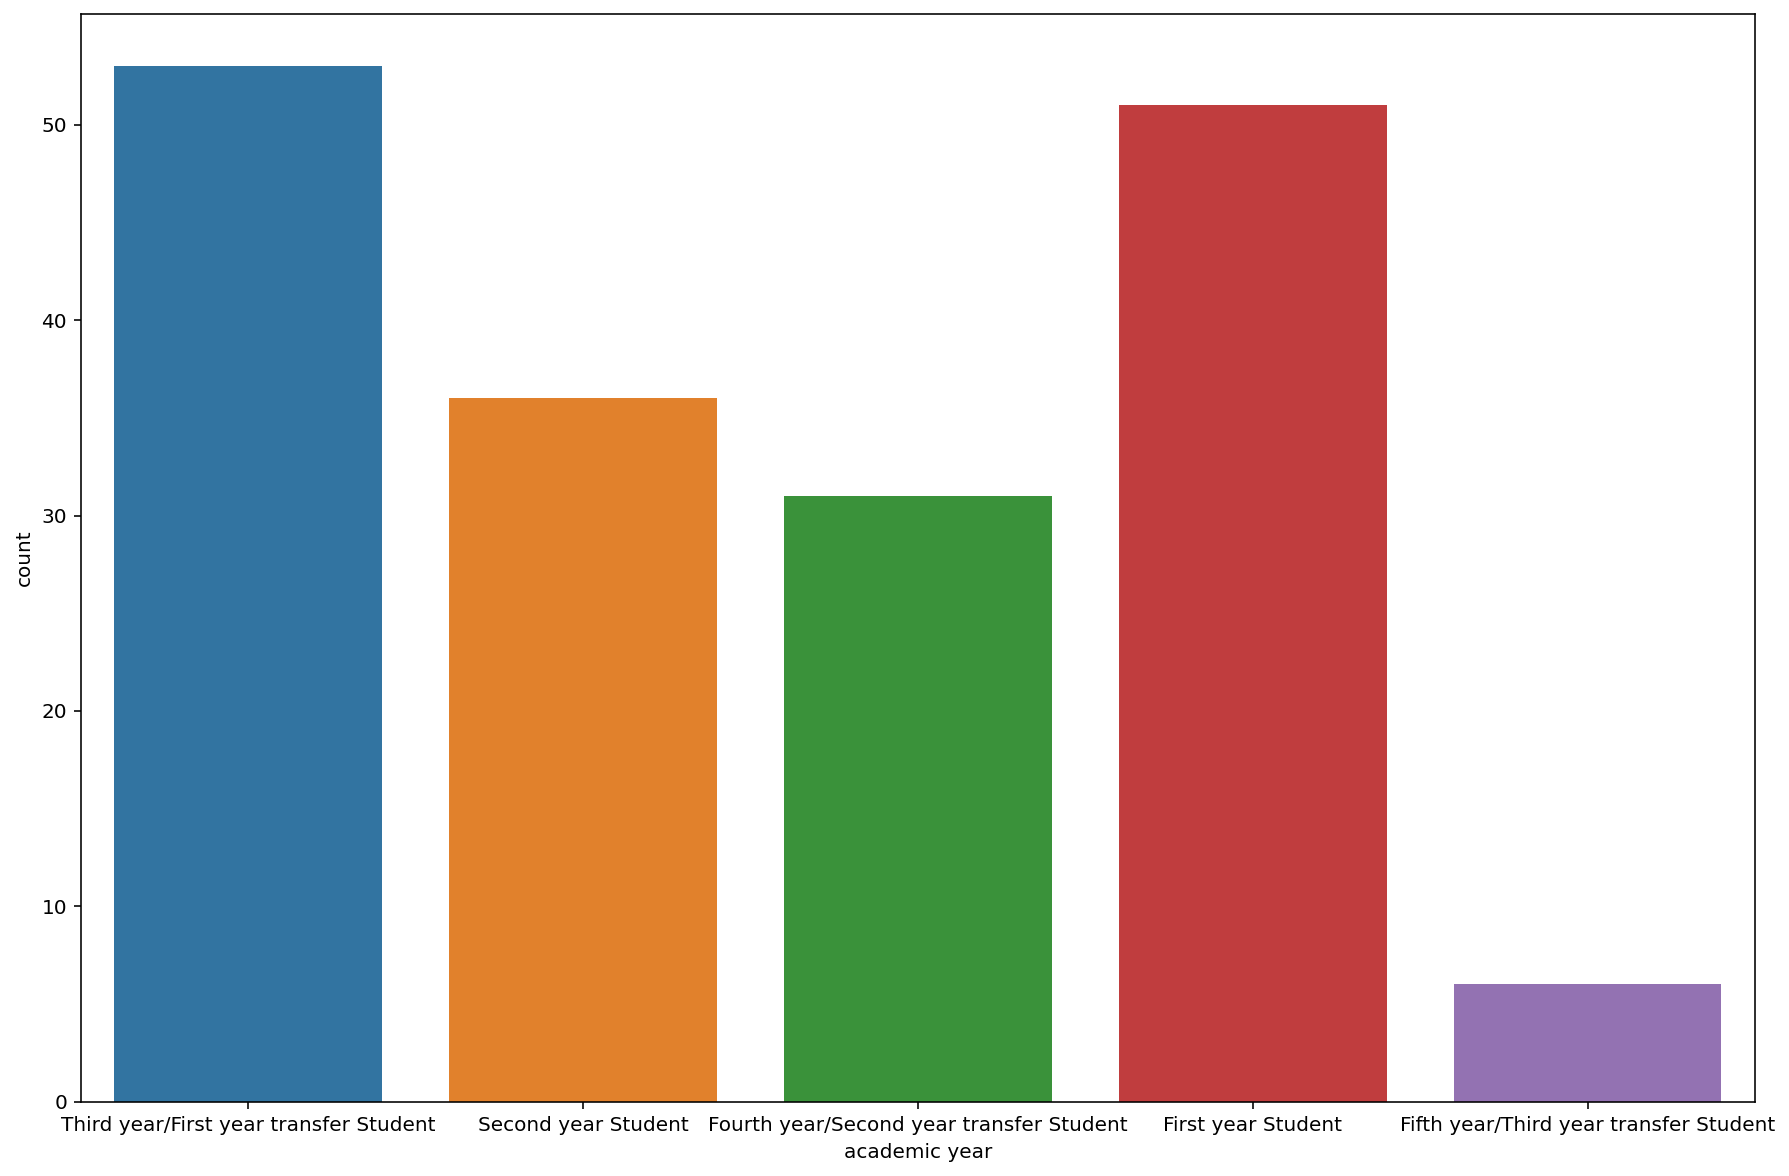

In [38]:
# year
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x = df["academic year"])

<BarContainer object of 8 artists>

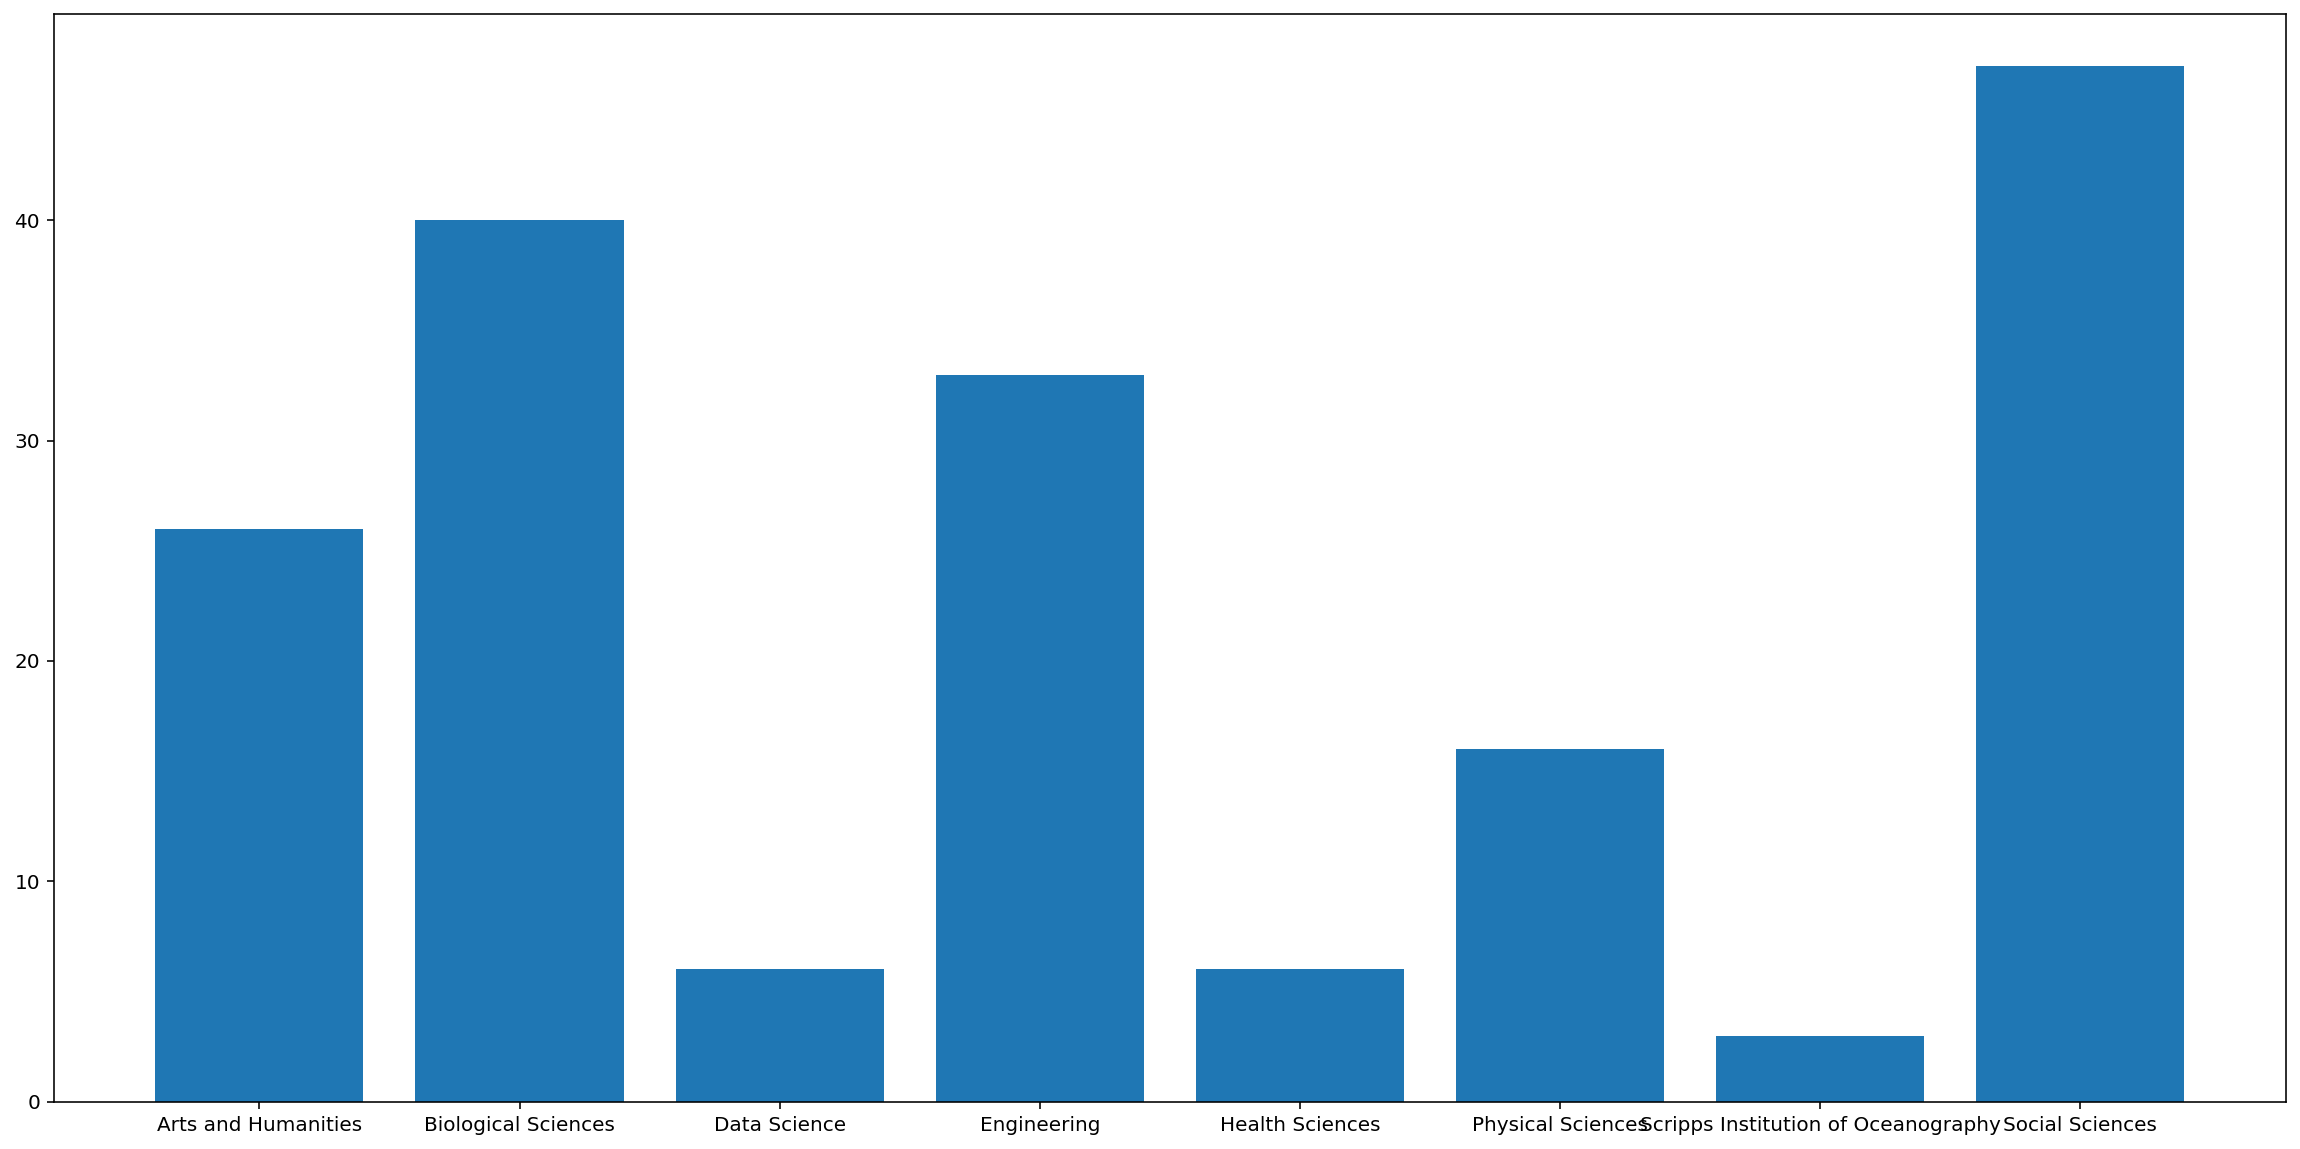

In [88]:
# academic department (allow multiple choices)
div_dict = {'Arts and Humanities': 0, 'Biological Sciences': 0, 'Data Science': 0, 'Engineering': 0, 'Health Sciences': 0, 'Physical Sciences': 0, 'Scripps Institution of Oceanography': 0, 'Social Sciences': 0}
for i in df["academic division(s)"]:
    if 'Arts and Humanities' in i:
        div_dict['Arts and Humanities'] += 1
    elif 'Biological Sciences' in i:
        div_dict['Biological Sciences'] += 1
    elif 'Data Science' in i:
        div_dict['Data Science'] += 1
    elif 'Engineering' in i:
        div_dict['Engineering'] += 1
    elif 'Health Sciences' in i:
        div_dict['Health Sciences'] += 1
    elif 'Physical Sciences' in i:
        div_dict['Physical Sciences'] += 1
    elif 'Scripps Institution of Oceanography' in i:
        div_dict['Scripps Institution of Oceanography'] += 1
    elif 'Social Sciences' in i:
        div_dict['Social Sciences'] += 1

fig, ax = plt.subplots(figsize=(20, 10))
div, num = zip(*div_dict.items())
plt.bar(div, num)

## What area(s) would you like to see Associated Students prioritize FUNDING in the upcoming year?

1. Food & Housing Resources (basic needs, financial assistance, etc.)
2. Concerts & Events (Sun God Festival, Triton Dine, special social events, etc.)
3. Transportation & Transformation (campus planning, public transportation, parking, etc.)
4. Health & Well-Being (holistic health/mental health resource accessibility)
5. Student Orgs (student organization support/funding)
6. Academic Affairs (academic accommodations)
7. Equity, Diversity, Inclusion & Social Justice
8. Enterprises & Services (AS Safe Rides, Triton Outfitters, KSDT, Triton TV)
9. Spirit & Athletics (building school spirit)
10. Environmental Justice Affairs (intersectional environmental advocacy)
11. College Affairs (college community building, leadership development)
12. Student Advocacy (academic integrity / student conduct violation counsel)
13. Civic Engagement & Local Affairs (Local government advocacy work)

## FUNDING Preference Comparison from Winter 2022 to Fall 2022

| WI22      | SP22 | FA22 |
| ----------- | ----------- | ----------- |
| 1. Food & Housing Resources (basic needs, financial assistance)| 1. Food & Housing Resources (basic needs, financial assistance)   | 1. Food & Housing Resources (basic needs, financial assistance, etc.)       |
| 2. Concerts & Events (Sun God festival, other social events)| 2. Concerts & Events (Sun God festival, other social events)    | 2. Concerts & Events (Sun God Festival, special social events, etc.)        |
| 3. Transportation & Transformation (public transportation, parking) | 3. Transportation & Transformation (public transportation, parking)   | 3. Transportation & Transformation (campus planning, public transportation, parking, etc.)     |
| 4. Health & Well-Being (physical/ mental health resource accessibility)   | 4. Student Organizations (student organization support/ funding) | 4. Health & Well-Being (holistic health/mental health resource accessibility)        |
| 5. Student Organizations (student organization support/ funding)  | 5. Health & Well-Being (physical/ mental health resource accessibility)  | 5. Student Orgs (student organization support/funding)        |

## What area(s) would you like to see Associated Students prioritize ADVOCACY in the upcoming year?

1. Food & Housing Resources (basic needs, financial assistance)
2. Health & Well-Being (holistic health/mental health resource accessibility)
3. Equity, Diversity, Inclusion & Social Justice
4. Transportation & Transformation (campus planning, public transportation, parking)
5. Environmental Justice Affairs (intersectional environmental advocacy)
6. Academic Affairs (academic accommodations)
7. Student Orgs (student organization support/funding)
8. Fostering Community (campus-wide event planning)
9. College Affairs (college community building, leadership development)
10. Enterprises & Services (AS Safe Rides, Triton Outfitters, KSDT, Triton TV)
11. Civic Engagement & Local Affairs (Local goverment advocacy work)
12. Spirit & Athletics (building school spirit)
13. Student Advocacy (academic integrity/student conduct violation counsel)

Other comments: Side walks to Rita Atkinson, lack of classes (including long waiting lists)

## ADVOCACY Preference Comparison from Winter 2022 to Fall 2022

| WI22      | SP22 | FA22 |
| ----------- | ----------- | ----------- |
| 1. Food & Housing Resources (basic needs, financial assistance)| 1. Food & Housing Resources (basic needs, financial assistance)   | 1. Food & Housing Resources (basic needs, financial assistance, etc.)       |
| 2. Health & Well-Being (physical/ mental health resource accessibility) | 2. Health & Well-Being (physical/ mental health resource accessibility)    | 2. Health & Well-Being (holistic health/mental health resource accessibility)        |
| 3. Equity, Diversity, Inclusion & Social Justice | 3. Equity, Diversity, Inclusion & Social Justice   | 3. Equity, Diversity, Inclusion & Social Justice     |
| 4. Transportation & Transformation (public transportation, parking)   | 4. Transportation & Transformation (public transportation, parking)  | 4. Transportation & Transformation (campus planning, public transportation, parking)        |
| 5. Environmental Justice Affairs (intersectional environmental advocacy)  | 5. Environmental Justice Affairs (intersectional environmental advocacy)  | 5. Environmental Justice Affairs (intersectional environmental advocacy)        |

#### If you have any questions or need clarifications, please contact Data Officer, Jiyeon Song, via jis036@ucsd.edu.